<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall_2025/blob/main/Module%202/4_Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2025 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor: Sergei V. Kalinin
- Materials Project example by Aditya Raghavan

These examples and visualization functions are from the Sebastian Rashka book, Chapter 1

https://subscription.packtpub.com/book/data/9781801819312/pref/preflvl1sec03/what-this-book-covers

# Linear regression

In [1]:
import numpy as np

num1=20
num2=20

x1 = np.linspace(0, 10, num1)
x2 = np.linspace(-3, 3, num2)

x = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)
y = 2 * x[:, 0] + 3 * x[:, 1] + 5 + 10*np.random.randn(num1*num2)

In [2]:
x1.shape, x2.shape, x.shape, y.shape

((20,), (20,), (400, 2), (400,))

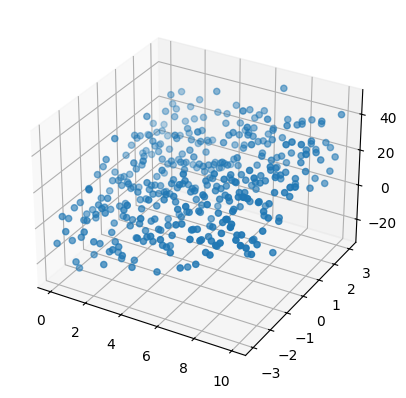

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print(model.coef_)
print(model.intercept_)

[2.11036359 2.84989059]
3.2722917801324343


# Linear regression - RANSAC

In [5]:
import pandas as pd

X = np.random.uniform(0, 100, 100)
x1 = np.random.choice([0, 1], 100, p=[0.8, 0.2])
y = 2*X - 1*x1*X + 5 + 20*np.random.randn(100)

df = pd.DataFrame({"x":X, "x1":x1, "y":y})

df.head(10)

,x,x1,y
0,87.326721,1,126.221025
1,4.726573,0,22.634803
2,45.564457,0,117.795342
3,37.002801,0,89.719179
4,4.545311,0,5.499292
5,1.927454,0,36.037792
6,1.829462,0,-1.270633
7,75.311044,1,65.096599
8,19.325386,0,60.292705
9,62.365476,0,167.772049


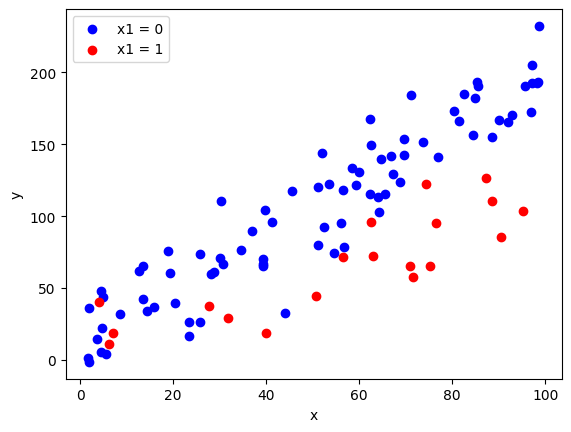

In [6]:
plt.scatter(df[df['x1'] == 0]['x'], df[df['x1'] == 0]['y'], color='blue', label='x1 = 0')
plt.scatter(df[df['x1'] == 1]['x'], df[df['x1'] == 1]['y'], color='red', label='x1 = 1')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [7]:
from sklearn.linear_model import RANSACRegressor

X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=0.90,
                         residual_threshold=None,
                         random_state=123)

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.9, random_state=123)

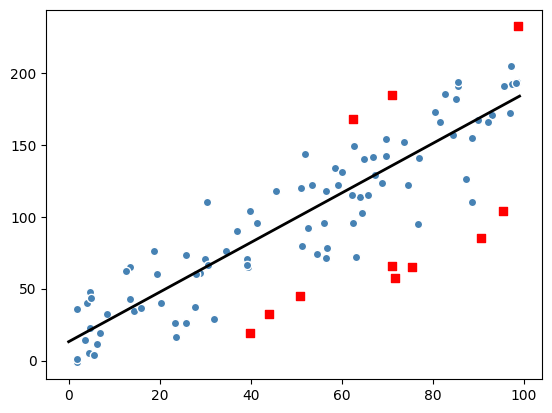

In [8]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 100, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', edgecolor='red',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.show()

# Logistic regression in scikit-learn

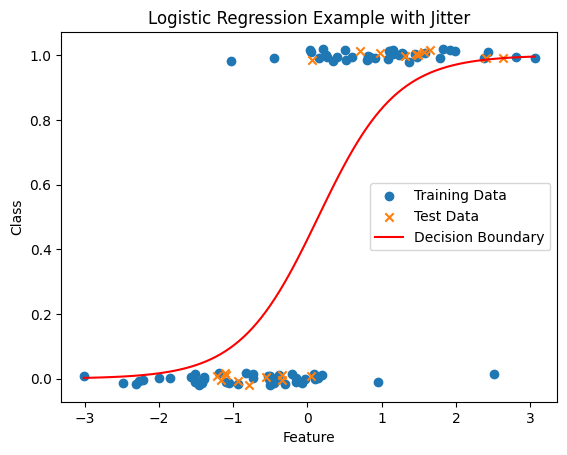

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
random_seed = 16
X, y = make_classification(n_samples=100,
                           n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=random_seed)

# Add jitter to y-coordinates for visualization
jitter = 0.02
jitter_array = np.random.uniform(-jitter, jitter, size=y.shape)
y = y.astype(float) + jitter_array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, np.round(y_train).astype(int))

# Generate data points for the decision boundary
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict_proba(x_range.reshape(-1, 1))[:, 1]

# Plot the data points and the decision boundary
plt.scatter(X_train, y_train, label='Training Data', marker='o')
plt.scatter(X_test, y_test, label='Test Data', marker='x')
plt.plot(x_range, y_pred, color='red', label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Logistic Regression Example with Jitter')
plt.legend()
plt.show()

In [10]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
model.coef_, model.intercept_

(array([[1.89955233]]), array([-0.27843644]))

Now, let's try it on Iris data set. Logistic function can be applied to multiple classes

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


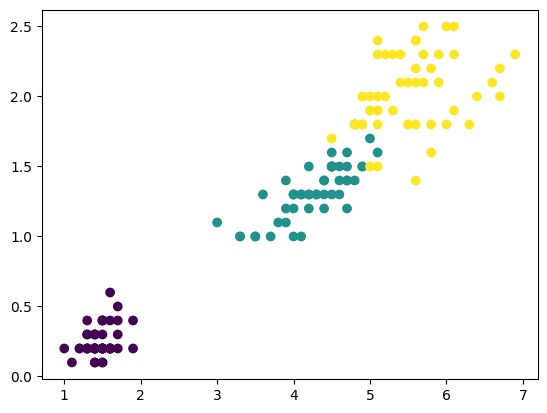

In [13]:
plt.scatter(X[:,0], X[:,1], c = y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [15]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


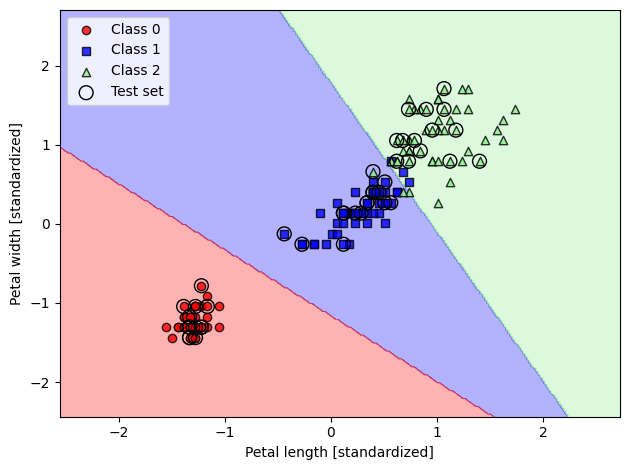

In [18]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100, solver='lbfgs',multi_class='multinomial') #'multinomial' 'ovr'
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Let's predict class membership probabilities for first 5 flowers:

In [19]:
lr.predict_proba(X_test_std[:5, :])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17],
       [2.69051224e-06, 9.03774465e-01, 9.62228444e-02],
       [3.98795554e-05, 9.94137274e-01, 5.82284636e-03]])

And identify the classes as argmax

In [20]:
lr.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 1, 1])

- We can get the same answer if we use predict() method
- Note that we have to use .reshape(1,-1) to get correct dimensionality

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [22]:
X_test_std[0, :].reshape(1, -1).shape, X_test_std[0, :].shape, X_test_std[0:3, :].shape

((1, 2), (2,), (3, 2))

Note that parameter C defines the regularization in logistic regression (inverse weight coefficient).
- Experiment with different C values for code above!
- Below we show weight coefficient vs. C

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

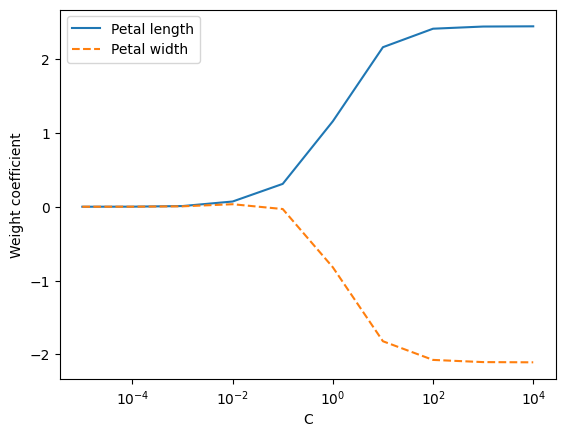

In [23]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Optional: DYI Logistic regression

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1232460378.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma (z)$')


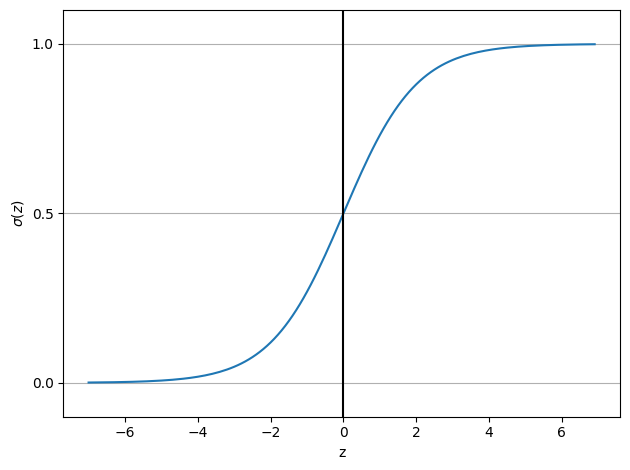

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1428138062.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


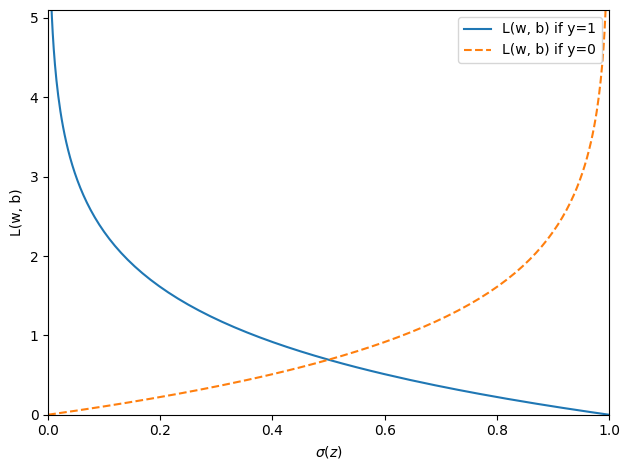

In [25]:
def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the
          number of examples and n_features is the
          number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : Instance of LogisticRegressionGD
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                   - ((1 - y).dot(np.log(1 - output)))
                    / X.shape[0])
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


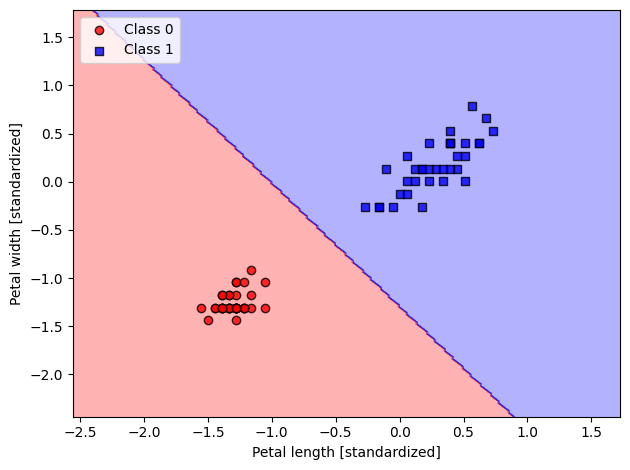

In [27]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic Regression on Materials Project Dataset

In [28]:
!pip -q install jarvis-tools matminer pymatgen scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 14.0 MB/s eta 0:00:00


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from matplotlib.colors import ListedColormap

# Materials-data helpers
from jarvis.db.figshare import data
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition

In [30]:
#@title Load the JARVIS 3D dataset and pick a bandgap column
# 1) Load JARVIS-DFT 3D bulk dataset (~76k rows)
df = pd.DataFrame(data("dft_3d"))
print("Rows loaded:", len(df))

# 2) Pick whichever bandgap column exists in this dump
bg_col = next(c for c in ["mbj_bandgap", "optb88vdw_bandgap", "bandgap"] if c in df.columns)
print("Using bandgap column:", bg_col)

# 3) Keep only formula + bandgap, make bandgap numeric, drop NaNs
df = df[["formula", bg_col]].copy()
df[bg_col] = pd.to_numeric(df[bg_col], errors="coerce")   # strings like "na" -> NaN
df = df.dropna(subset=[bg_col])
df[bg_col] = df[bg_col].clip(lower=0)  # tiny negatives -> 0

display(df.head())


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:02<00:00, 18.8MiB/s]


Loading the zipfile...
Loading completed.
Rows loaded: 75993
Using bandgap column: mbj_bandgap


,formula,mbj_bandgap
4,VSe2,0.000
6,Ba4NaBi,0.000
16,FeOF,0.000
24,AlAs,2.276
25,SrB6,0.256


In [31]:
# We use Matminer (Magpie) to turn chemical formulas into numbers.
ep = ElementProperty.from_preset("magpie")

def featurize_formula(f):
    try:
        return ep.featurize(Composition(f))
    except Exception:
        return None

feat_list = df["formula"].apply(featurize_formula)
mask_ok = feat_list.notnull()
df_feat = pd.DataFrame(feat_list[mask_ok].tolist(), columns=ep.feature_labels())
df_lbls = df[mask_ok].reset_index(drop=True)

# Pick TWO robust features (rarely missing) for clear 2D plots:
#   - Mean Mendeleev number
#   - Mean atomic number
def pick_col(cols, tokens):
    tokens = [t.lower() for t in tokens]
    for c in cols:
        s = c.lower().replace(" ", "")
        if all(t in s for t in tokens):
            return c
    raise ValueError(f"Couldn't find feature with tokens {tokens}")

col_A = pick_col(df_feat.columns, ["mean","mendeleev"])
col_B = pick_col(df_feat.columns, ["mean","number"])
feature_names = ["Mean Mendeleev number", "Mean atomic number"]

X_raw = df_feat[[col_A, col_B]].to_numpy(dtype=float)
y_bg  = df_lbls[bg_col].to_numpy(dtype=float)

# Remove any rows with NaN/inf in the two features
mask_fin = np.isfinite(X_raw).all(axis=1)
X_raw, y_bg = X_raw[mask_fin], y_bg[mask_fin]
print("Rows after featurization & cleanup:", X_raw.shape[0])

# keep only a fraction of the dataset (say 20%)
frac = 0.3
np.random.seed(42)  # reproducibility
idx = np.random.choice(len(X_raw), size=int(len(X_raw) * frac), replace=False)

X_raw_small = X_raw[idx]
y_bg_small = y_bg[idx]

# print("Rows after subsampling:", X_raw_small.shape[0])

# # now do train/test split on smaller dataset
# X_train, X_test, y_bg_train, y_bg_test = train_test_split(
#     X_raw_small, y_bg_small, test_size=0.4, random_state=1, stratify=y_bg_small
# )

# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std  = sc.transform(X_test)

# print("Train size:", X_train_std.shape, "Test size:", X_test_std.shape)

# # For clearer figures, we'll also keep a small subset of points to scatter
# rng = np.random.default_rng(0)
# plot_idx = rng.choice(X_train_std.shape[0], size=min(2000, X_train_std.shape[0]), replace=False)
# X_plot = X_train_std[plot_idx]


/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


Rows after featurization & cleanup: 19805


In [32]:
#@title Helpers Functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Balanced per-class subsample (keeps plots & training simple/clear)
def stratified_downsample(X, y, per_class=2000, seed=42):
    rng = np.random.default_rng(seed)
    idx_all = []
    for c in np.unique(y):
        idx_c = np.where(y == c)[0]
        take = min(per_class, len(idx_c))
        pick = rng.choice(idx_c, size=take, replace=False)
        idx_all.append(pick)
    sel = np.concatenate(idx_all)
    return X[sel], y[sel]

# Readable decision-region plot (always overlays a SMALL balanced scatter)
def plot_decision_regions_clean(X, y, classifier, class_names,
                                max_points=1500, seed=0, resolution=0.03):
    rng = np.random.default_rng(seed)
    K = len(np.unique(y))
    palette = [mpl.colormaps['tab10'](i) for i in range(K)]
    cmap = ListedColormap(palette)
    markers = ['o','s','^','v','<','>','P','D','X','*'][:K]

    # background from ALL data
    x1_min, x1_max = np.nanpercentile(X[:,0], [1, 99]); pad = 0.5
    x2_min, x2_max = np.nanpercentile(X[:,1], [1, 99])
    x1_min, x1_max = x1_min - pad, x1_max + pad
    x2_min, x2_max = x2_min - pad, x2_max + pad
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()); plt.ylim(xx2.min(), xx2.max())

    # balanced overlay (≤ max_points total)
    per_class = max(1, max_points // K)
    Xs, ys = [], []
    for i, cl in enumerate(np.unique(y)):
        idx = np.where(y == cl)[0]
        take = min(per_class, len(idx))
        pick = rng.choice(idx, size=take, replace=False)
        Xs.append(X[pick]); ys.append(np.full(take, cl, int))
    X_plot = np.vstack(Xs); y_plot = np.hstack(ys)

    jitter = 0.03
    X_plot = X_plot + rng.normal(0, jitter, size=X_plot.shape)

    for i, cl in enumerate(np.unique(y_plot)):
        plt.scatter(X_plot[y_plot==cl,0], X_plot[y_plot==cl,1],
                    c=[palette[i]], marker=markers[i], edgecolor='black',
                    alpha=0.9, s=24, label=class_names[cl])

# Safety: make sure X_raw, y_bg exist
try:
    _ = X_raw.shape, y_bg.shape
except NameError:
    raise RuntimeError("Please run the JARVIS featurization cell first to define X_raw (2 features) and y_bg (bandgaps).")

# Optional: nice axis labels if you didn’t set them earlier
if 'feature_names' not in globals():
    feature_names = ['Feature 1', 'Feature 2']


Binary subsampled size: 4000 | counts: {0: 2000, 1: 2000}
Binary accuracy (test): 0.6825


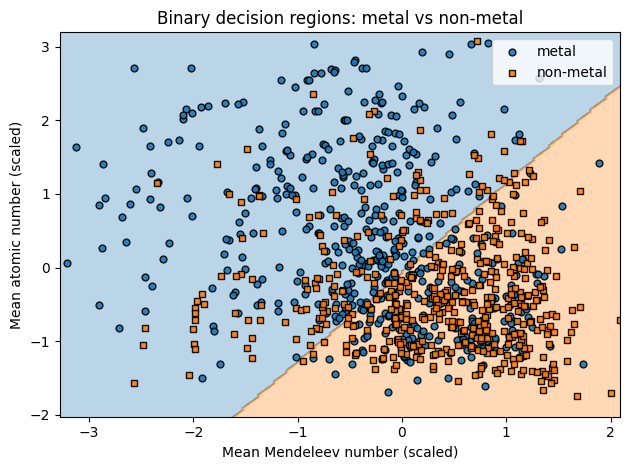

In [33]:
#@title Binary: metal (≤0.01 eV) vs non‑metal (>0.01 eV)
from sklearn.linear_model import LogisticRegression

# 1) Make binary labels
y_bin = (y_bg > 0.01).astype(int)   # 0 = metal, 1 = non‑metal
names_bin = {0: "metal", 1: "non-metal"}

# 2) Downsample per class to keep the learning problem small & balanced
X_small_bin, y_small_bin = stratified_downsample(X_raw, y_bin, per_class=2000, seed=42)
print("Binary subsampled size:", X_small_bin.shape[0],
      "| counts:", {int(c): int((y_small_bin==c).sum()) for c in np.unique(y_small_bin)})

# 3) Train/test split (stratified) and scale
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_small_bin, y_small_bin, test_size=0.3, random_state=1, stratify=y_small_bin
)
sc_b = StandardScaler()
X_train_b = sc_b.fit_transform(X_train_b)
X_test_b  = sc_b.transform(X_test_b)

# 4) Fit logistic regression (binary)
lr_bin = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_bin.fit(X_train_b, y_train_b)
print("Binary accuracy (test):", lr_bin.score(X_test_b, y_test_b))

# 5) Plot readable decision regions
plot_decision_regions_clean(
    X_train_b, y_train_b, lr_bin, class_names=names_bin,
    max_points=1000, seed=1
)
plt.xlabel(f'{feature_names[0]} (scaled)'); plt.ylabel(f'{feature_names[1]} (scaled)')
plt.title("Binary decision regions: metal vs non‑metal")
plt.legend(); plt.tight_layout(); plt.show()


3-class subsampled size: 6000 | counts: {0: 2000, 1: 2000, 2: 2000}
3-class accuracy (test): 0.5333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


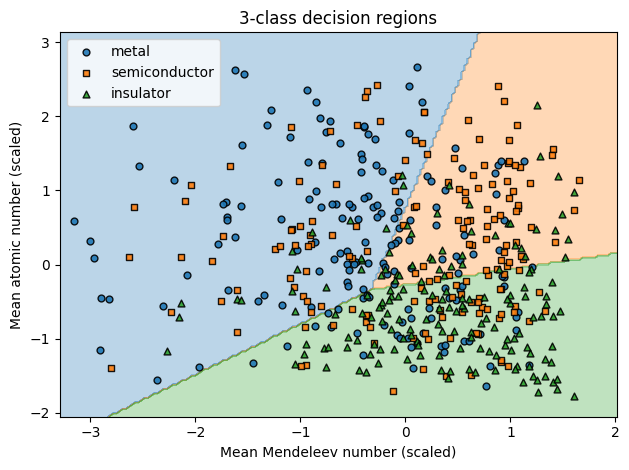

In [34]:
#@title 3-class: metal (≤0.01 eV), semiconductor (0.01–2 eV), insulator (>2 eV)
from sklearn.linear_model import LogisticRegression

# 1) Make 3-class labels
def gap_to_class(g):
    if g <= 0.01: return 0
    if g <= 2.0:  return 1
    return 2
y3 = np.array([gap_to_class(g) for g in y_bg], dtype=int)
names_3 = {0: "metal", 1: "semiconductor", 2: "insulator"}

# 2) Downsample per class (balanced)
X_small_3, y_small_3 = stratified_downsample(X_raw, y3, per_class=2000, seed=7)
print("3-class subsampled size:", X_small_3.shape[0],
      "| counts:", {int(c): int((y_small_3==c).sum()) for c in np.unique(y_small_3)})

# 3) Train/test split (stratified) and scale
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_small_3, y_small_3, test_size=0.3, random_state=1, stratify=y_small_3
)
sc_3 = StandardScaler()
X_train_3 = sc_3.fit_transform(X_train_3)
X_test_3  = sc_3.transform(X_test_3)

# 4) Fit multinomial logistic regression
lr_3 = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
lr_3.fit(X_train_3, y_train_3)
print("3-class accuracy (test):", lr_3.score(X_test_3, y_test_3))

# 5) Plot readable decision regions
plot_decision_regions_clean(
    X_train_3, y_train_3, lr_3, class_names=names_3,
    max_points=500, seed=2  # ~150 points/class
)
plt.xlabel(f'{feature_names[0]} (scaled)'); plt.ylabel(f'{feature_names[1]} (scaled)')
plt.title("3‑class decision regions")
plt.legend(); plt.tight_layout(); plt.show()


In [35]:
# size of balanced per-class sample to train/tune on (keeps things fast & readable)
PER_CLASS = 1500        # try 300–1000
TEST_SIZE = 0.30       # test split
CV_FOLDS  = 5          # cross-validation folds
N_ITER    = 30         # number of random samples from the search space
RANDOM_SEED = 7

In [36]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# ---------- Safety checks ----------
try:
    _ = X_raw.shape, y_bg.shape
except NameError:
    raise RuntimeError("Run your JARVIS featurization cell first to define X_raw (2 features) and y_bg (bandgaps).")
if 'feature_names' not in globals():
    feature_names = ['Feature 1', 'Feature 2']

# ---------- Helpers ----------
def stratified_downsample(X, y, per_class=1200, seed=42):
    """Balanced downsample: at most per_class samples per label."""
    rng = np.random.default_rng(seed)
    idx_all = []
    for c in np.unique(y):
        idx_c = np.where(y == c)[0]
        take = min(per_class, len(idx_c))
        pick = rng.choice(idx_c, size=take, replace=False)
        idx_all.append(pick)
    sel = np.concatenate(idx_all)
    return X[sel], y[sel]

def build_labels(mode, y_bg):
    """Make discrete labels from bandgap for 'binary' or 'three' class tasks."""
    if mode == "binary":
        y = (y_bg > 0.01).astype(int)  # 0 metal, 1 non-metal
        names = {0:"metal", 1:"non-metal"}
    elif mode == "three":
        y = np.where(y_bg <= 0.01, 0, np.where(y_bg <= 2.0, 1, 2))
        names = {0:"metal", 1:"semiconductor", 2:"insulator"}
    else:
        raise ValueError("mode must be 'binary' or 'three'")
    return y, names

def build_dataset(mode, per_class=PER_CLASS, test_size=TEST_SIZE, seed=RANDOM_SEED):
    """From X_raw, y_bg -> (X_train, X_test, y_train, y_test, class_names)."""
    y_cls, class_names = build_labels(mode, y_bg)
    X_small, y_small = stratified_downsample(X_raw, y_cls, per_class=per_class, seed=seed)
    X_train, X_test, y_train, y_test = train_test_split(
        X_small, y_small, test_size=test_size, stratify=y_small, random_state=seed
    )
    return X_train, X_test, y_train, y_test, class_names

def plot_decision_regions_clean(X, y, classifier, class_names,
                                max_points=700, seed=0, resolution=0.03):
    """Background = regions from ALL X, overlay = small balanced scatter (<= max_points)."""
    rng = np.random.default_rng(seed)
    K = len(np.unique(y))
    palette = [mpl.colormaps['tab10'](i) for i in range(K)]
    cmap = ListedColormap(palette)
    markers = ['o','s','^','v','<','>','P','D','X','*'][:K]

    # robust bounds
    x1_min, x1_max = np.nanpercentile(X[:,0], [1, 99]); pad = 0.5
    x2_min, x2_max = np.nanpercentile(X[:,1], [1, 99])
    x1_min, x1_max = x1_min - pad, x1_max + pad
    x2_min, x2_max = x2_min - pad, x2_max + pad

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.30, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()); plt.ylim(xx2.min(), xx2.max())

    # balanced overlay
    per_class = max(1, max_points // K)
    Xs, ys = [], []
    for i, cl in enumerate(np.unique(y)):
        idx = np.where(y == cl)[0]
        take = min(per_class, len(idx))
        pick = rng.choice(idx, size=take, replace=False)
        Xs.append(X[pick]); ys.append(np.full(take, cl, int))
    X_plot = np.vstack(Xs); y_plot = np.hstack(ys)
    X_plot = X_plot + rng.normal(0, 0.03, size=X_plot.shape)  # tiny jitter

    for i, cl in enumerate(np.unique(y_plot)):
        plt.scatter(X_plot[y_plot==cl,0], X_plot[y_plot==cl,1],
                    c=[palette[i]], marker=markers[i], edgecolor='black',
                    alpha=0.9, s=24, label=class_names[cl])

def logistic_search(mode, X_train, y_train, n_iter=N_ITER, cv_folds=CV_FOLDS, seed=RANDOM_SEED):
    """Randomized hyperparameter search for LogisticRegression in a Pipeline with StandardScaler."""
    multi = 'ovr' if mode == 'binary' else 'multinomial'
    pipe = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class=multi))
    ])
    # Search space: C on log scale, with/without class_weight balanced
    param_distributions = {
        'lr__C': loguniform(1e-3, 1e3),
        'lr__class_weight': [None, 'balanced']
    }
    scoring = 'accuracy' if mode=='binary' else 'accuracy'  # could use f1_macro for 3-class
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=seed)
    rs = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_distributions,
        n_iter=n_iter, scoring=scoring, cv=cv,
        random_state=seed, n_jobs=-1, refit=True, verbose=0
    )
    rs.fit(X_train, y_train)
    return rs


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best CV score (mean accuracy): 0.673
Best params: {'lr__C': np.float64(21.917502612130622), 'lr__class_weight': None}
Test accuracy: 0.689


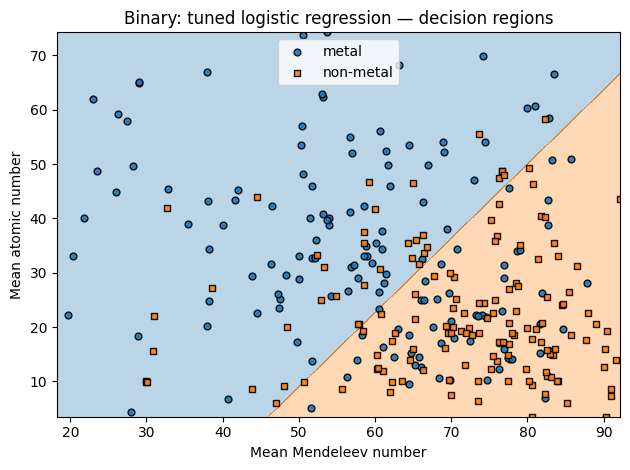

In [37]:
#@title Hyperparameter search: Binary task
MODE = 'binary'
X_train_b, X_test_b, y_train_b, y_test_b, names_bin = build_dataset(MODE)

search_bin = logistic_search(MODE, X_train_b, y_train_b)
print("Best CV score (mean accuracy):", round(search_bin.best_score_, 3))
print("Best params:", search_bin.best_params_)

best_bin = search_bin.best_estimator_
test_acc = best_bin.score(X_test_b, y_test_b)
print("Test accuracy:", round(test_acc, 3))

# Plot decision regions from the tuned model (Pipeline handles scaling internally)
plot_decision_regions_clean(X_train_b, y_train_b, best_bin, class_names=names_bin,
                            max_points=300, seed=1)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("Binary: tuned logistic regression — decision regions")
plt.legend(); plt.tight_layout(); plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best CV score (mean accuracy): 0.529
Best params: {'lr__C': np.float64(0.002869787477867181), 'lr__class_weight': 'balanced'}
Test accuracy: 0.533


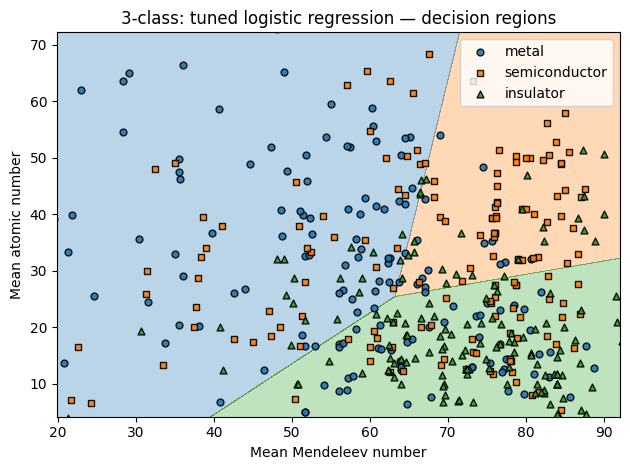

In [38]:
#@title Hyperparameter search: 3‑class task
MODE = 'three'
X_train_3, X_test_3, y_train_3, y_test_3, names_3 = build_dataset(MODE)

search_3 = logistic_search(MODE, X_train_3, y_train_3)
print("Best CV score (mean accuracy):", round(search_3.best_score_, 3))
print("Best params:", search_3.best_params_)

best_3 = search_3.best_estimator_
test_acc = best_3.score(X_test_3, y_test_3)
print("Test accuracy:", round(test_acc, 3))

plot_decision_regions_clean(X_train_3, y_train_3, best_3, class_names=names_3,
                            max_points=450, seed=2)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("3‑class: tuned logistic regression — decision regions")
plt.legend(); plt.tight_layout(); plt.show()
